In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from scipy.stats import linregress

In [2]:
output_data_file = "Resources/student-merge.csv"
por_path = "Resources/student-por.csv"
math_path = "Resources/student-mat.csv"

por_df = pd.read_csv(por_path)
math_df = pd.read_csv(math_path)

In [3]:
students_df = pd.merge(por_df, math_df, on=["school","sex","age","address","famsize",
                                            "Pstatus","Medu","Fedu","Mjob","Fjob","reason",
                                            "guardian", "traveltime","nursery","higher",
                                            "internet","romantic","famrel","freetime",
                                            "goout","Dalc","Walc","health"])
students_df.columns = students_df.columns.str.replace("_x","_por")
students_df.columns = students_df.columns.str.replace("_y","_math")
#students_df.to_csv(output_data_file)
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,absences_math,G1_math,G2_math,G3_math
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,2,0,yes,no,no,no,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2,0,no,yes,no,no,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,yes,no,yes,no,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,0,no,yes,yes,yes,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,0,no,yes,yes,no,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,F,19,R,GT3,T,2,3,services,other,...,3,1,no,no,no,yes,0,7,5,0
366,MS,F,18,U,LE3,T,3,1,teacher,services,...,2,0,no,yes,yes,no,0,7,9,8
367,MS,F,18,U,GT3,T,1,1,other,other,...,2,1,no,no,no,yes,0,6,5,0
368,MS,M,17,U,LE3,T,3,1,services,services,...,1,0,no,no,no,no,3,14,16,16


F    195
M    175
Name: sex, dtype: int64


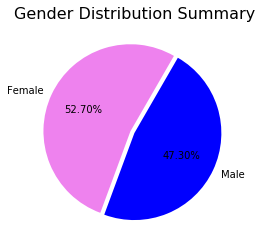

In [4]:
# Generate a pie plot showing the distribution of female versus male  using Pandas
# Do boys tend to consume alcohol or girls?
gender_count=students_df["sex"].value_counts()
print(gender_count)
colour_plot=["violet","blue"]
explode_plot=(0.05,0)
plt.pie(gender_count,labels=['Female','Male'],autopct='%0.2f%%',colors=colour_plot,explode=explode_plot,startangle=60)
plt.title("Gender Distribution Summary",fontsize=16)
plt.show()


In [5]:
age_count=students_df["age"].value_counts()

student_age=students_df["age"].unique()

In [6]:
student_age_mean=students_df["age"].mean()
student_age_median=students_df["age"].median()

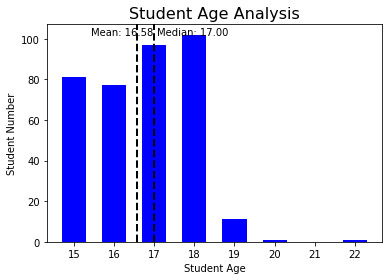

In [7]:

fig=plt.bar(student_age,age_count,color='b',align="center", width= 0.6)
plt.title("Student Age Analysis",fontsize=16)
plt.xlabel("Student Age")
plt.ylabel("Student Number")
plt.rcParams['figure.figsize'] = [8, 6]
plt.axvline(student_age_mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(student_age_median, color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(student_age_mean*0.93, max_ylim*0.95, 'Mean: {:.2f}'.format(student_age_mean))

plt.text(student_age_mean*1.03, max_ylim*0.95, 'Median: {:.2f}'.format(student_age_median))
plt.show()

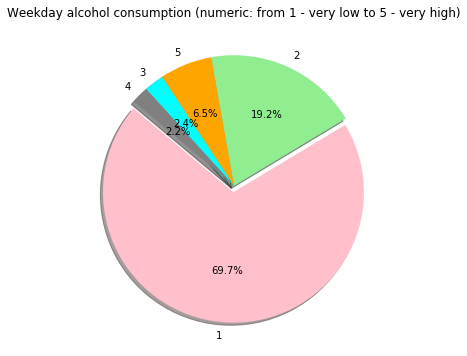

In [8]:
labels = students_df["Dalc"].unique()
amount = students_df["Dalc"].value_counts()

colours = ["pink","lightgreen","orange","cyan","gray"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekday alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.show()

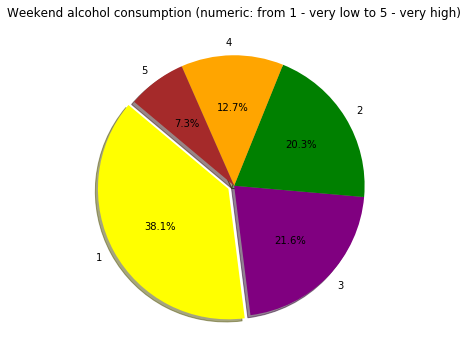

In [9]:
labels = students_df["Walc"].unique()
amount = students_df["Walc"].value_counts()

colours = ["yellow","purple","green","orange","brown"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.show()

In [10]:
x1 = students_df.loc[students_df["paid_math"]=="yes","paid_math"].count()
x2 = students_df.loc[students_df["paid_por"]=="yes","paid_por"].count()
x3 = students_df.loc[students_df["paid_math"]=="no","paid_math"].count()
x4 = students_df.loc[students_df["paid_por"]=="no","paid_por"].count()

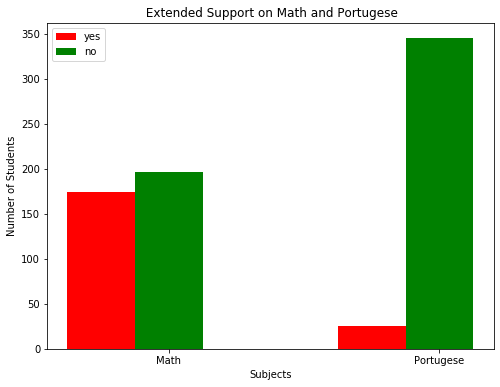

In [11]:
N = 2
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, [x1,x2], width, color = 'r', label= 'yes')

bar2 = plt.bar(ind+width, [x3,x4], width, color='g', label='no')

plt.xlabel("Subjects")
plt.ylabel('Number of Students')
plt.title(" Extended Support on Math and Portugese")
  
plt.xticks(ind+width,['Math', 'Portugese'])
plt.legend( (bar1, bar2), ('yes', 'no') )
plt.show()

In [12]:
#Weekly study time vs portugese final grades
studyhours = [1,2,3,4]

#Create empty list to fill with final grades
por_data = []
math_data = []

for studies in studyhours:
    #Locate the rows which contains the weekly study time for portugese and get the final grade
    study_por = students_df.loc[students_df['studytime_por'] == studies, 'G3_por']
    study_math = students_df.loc[students_df['studytime_math'] == studies, 'G3_math']
    
    #Add subset
    por_data.append(study_por)
    math_data.append(study_math)

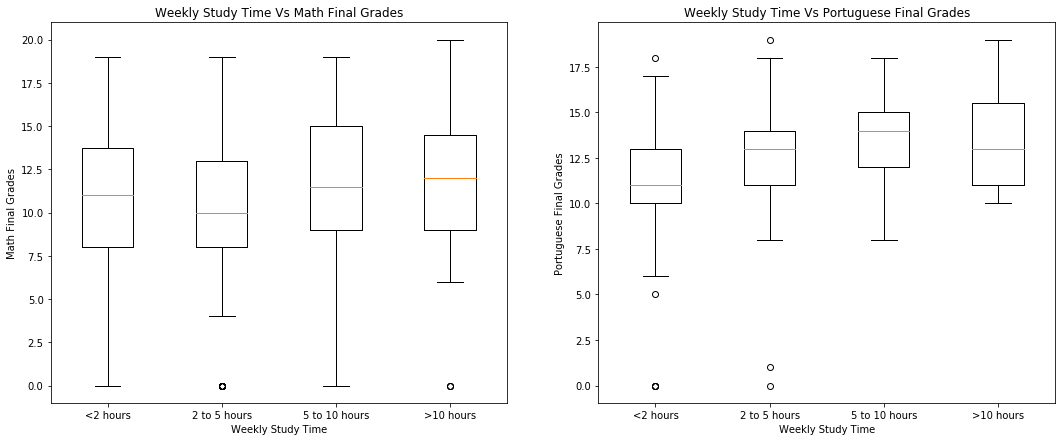

In [36]:
f = plt.figure(figsize=(18,7))

ax = f.add_subplot(121)
ax.boxplot(math_data, labels=studyhours)
ax.set_title('Weekly Study Time Vs Math Final Grades')
ax.set_ylabel('Math Final Grades')
ax.set_xlabel('Weekly Study Time')
plt.xticks([1,2,3,4],['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'])

ax = f.add_subplot(122)
ax.boxplot(por_data, labels=studyhours)
ax.set_title('Weekly Study Time Vs Portuguese Final Grades')
ax.set_ylabel('Portuguese Final Grades')
ax.set_xlabel('Weekly Study Time')
plt.xticks([1,2,3,4],['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'])

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7da1f4dcd0>,
      dtype=object)

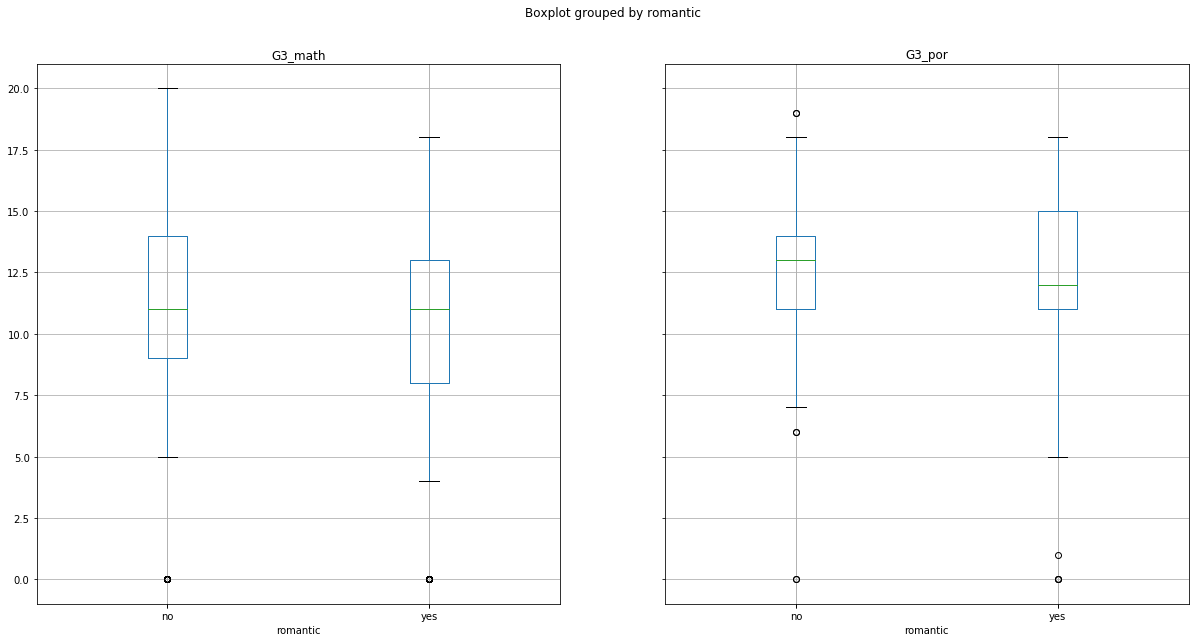

In [15]:
students_df.boxplot(["G3_math","G3_por"], by="romantic", figsize=(20, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d9218e6d0>,
      dtype=object)

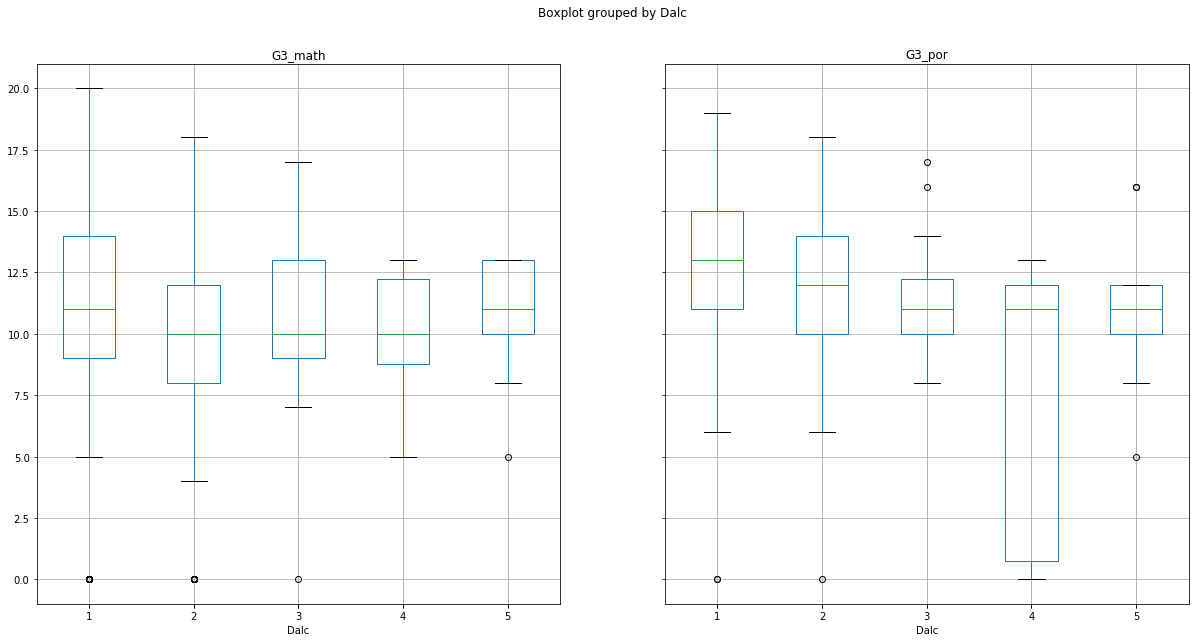

In [16]:
students_df.boxplot(["G3_math","G3_por"], by="Dalc", figsize=(20, 10))

In [17]:
#Daily Consumption of alcohol vs portugese final grades
dalc_cons = [1,2,3,4,5]

#Create empty list to fill with final grades
poralc_data = []
mathalc_data = []

for x in dalc_cons:
    #Locate the rows which contains the Daily consumption of alcohol and get the final grade
    dalc_por = students_df.loc[students_df['Dalc'] == studies, 'G3_por']
    dalc_math = students_df.loc[students_df['Dalc'] == studies, 'G3_math']
    
    #Add subset
    poralc_data.append(dalc_por)
    mathalc_data.append(dalc_math)

Math: y = 0.03x + 5.04
Portugese: y = -0.2x + 6.1


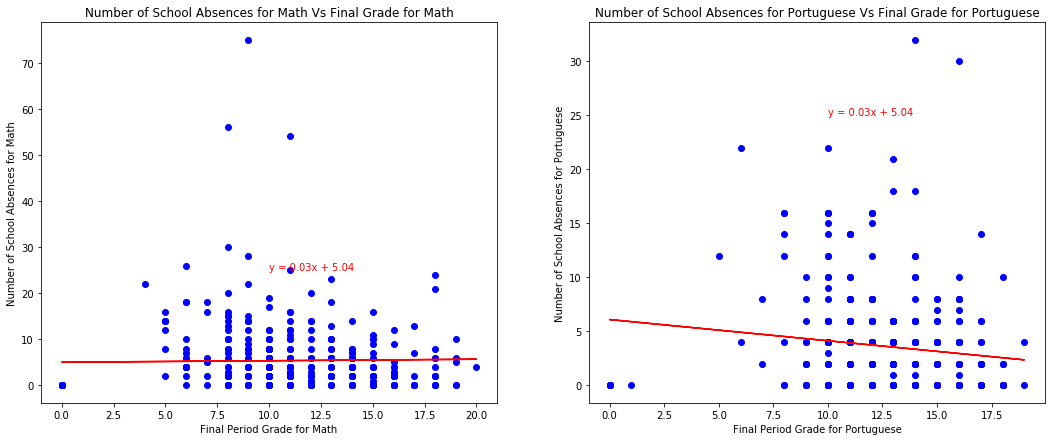

In [40]:
f = plt.figure(figsize=(18,7))

ax = f.add_subplot(121)
xm_values = students_df['G3_math']
ym_values = students_df['absences_math']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xm_values, ym_values)
regressm_values = xm_values * slope + intercept
linem_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f"Math: {linem_eq}")

ax.scatter(xm_values,ym_values, color='b')
ax.plot(xm_values,regressm_values,'r-')
ax.set_title('Number of School Absences for Math Vs Final Grade for Math')
ax.set_xlabel('Final Period Grade for Math')
ax.set_ylabel('Number of School Absences for Math')
ax.annotate(line_eq, (10,25),color='r')

# Identify the relationship of Student Absences for Math and Final Math Grade
ax = f.add_subplot(122)
x_values = students_df['G3_por']
y_values = students_df['absences_por']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linep_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f"Portugese: {linep_eq}")

ax.scatter(x_values,y_values, color='b')
ax.plot(x_values,regress_values,'r-')
ax.set_title('Number of School Absences for Portuguese Vs Final Grade for Portuguese')
ax.set_xlabel('Final Period Grade for Portuguese')
ax.set_ylabel('Number of School Absences for Portuguese')
ax.annotate(line_eq, (10,25),color='r')

plt.show()

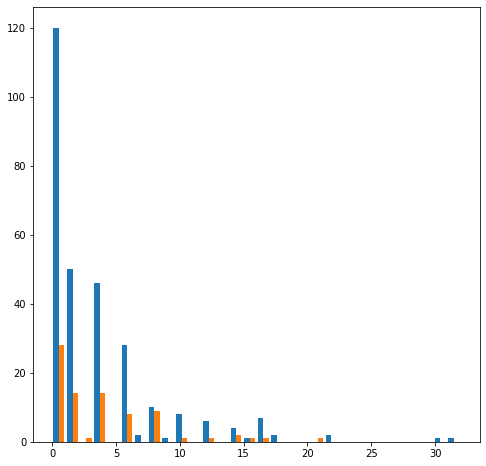

In [29]:
#Distribution of absences for students who live in city
fig3 = plt.figure(figsize=(8,8))
ax3  = fig3.add_subplot(111)
urban = students_df[students_df["address"] == 'U']
absences_urban = urban["absences_por"]
rural = students_df[students_df["address"] == 'R']
absences_rural = rural["absences_por"]
plt.hist([absences_urban, absences_rural], bins=30, label=['Urban','Absences'])
plt.show()

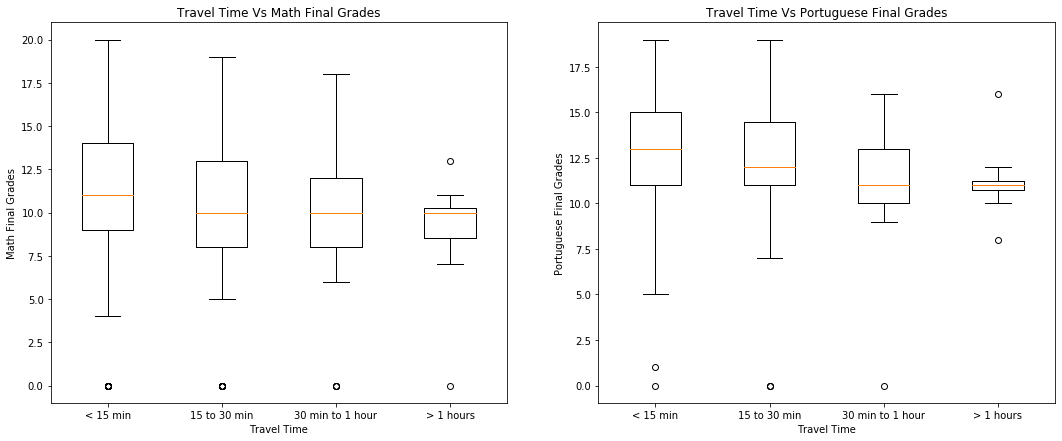

In [38]:
# Travel Time Vs portuguese Final Grades
travel = [1, 2, 3, 4]
# Create empty list to fill with G3 Grades
travelpor_data = []
travelmath_data= []

for travels in travel:
# Locate the rows which contain weekly study time on Portuguese and get the final Grade
    tra_por = students_df.loc[students_df['traveltime'] == travels,'G3_por']
    tra_math = students_df.loc[students_df['traveltime'] == travels,'G3_math']
    # add subset
    travelpor_data.append(tra_por)
    travelmath_data.append(tra_math)


f = plt.figure(figsize=(18,7))

ax = f.add_subplot(121)
ax.boxplot(travelmath_data, labels=Travel)
ax.set_title('Travel Time Vs Math Final Grades')
ax.set_ylabel('Math Final Grades')
ax.set_xlabel('Travel Time')
plt.xticks([1,2,3,4],['< 15 min', '15 to 30 min', '30 min to 1 hour', '> 1 hours'])

ax = f.add_subplot(122)
ax.boxplot(travelpor_data, labels=Travel)
ax.set_title('Travel Time Vs Portuguese Final Grades')
ax.set_ylabel('Portuguese Final Grades')
ax.set_xlabel('Travel Time')
plt.xticks([1,2,3,4],['< 15 min', '15 to 30 min', '30 min to 1 hour', '> 1 hours'])

plt.show()

In [56]:
ave_schoolsup_por = schoolsup_por["G3_por"].mean()
ave_famsup_por = famsup_por["G3_por"].mean()
ave_paid_por = paid_por["G3_por"].mean()
ave_act_por = act_por["G3_por"].mean()
ave_schoolsup_math = schoolsup_math["G3_math"].mean()
ave_famsup_math = famsup_math["G3_math"].mean()
ave_paid_math = paid_math["G3_math"].mean()
ave_act_math = act_math["G3_math"].mean()

schoolsup_por = students_df.groupby(['schoolsup_por'])
famsup_por = students_df.groupby(['famsup_por'])
paid_por = students_df.groupby(['paid_por'])
act_por = students_df.groupby(['activities_por'])
schoolsup_math = students_df.groupby(['schoolsup_math'])
famsup_math = students_df.groupby(['famsup_math'])
paid_math = students_df.groupby(['paid_math'])
act_math = students_df.groupby(['activities_math'])

averagemath_df = pd.DataFrame({'Extra Educational Support':ave_schoolsup_math,
                              'Family Educational Support':ave_famsup_math,
                              'Extra Paid Classes':ave_paid_math,
                              'Extra-curricular Activities':ave_act_math})
averagemath_df.style.set_caption("Factors that Affect the Final Grade Average for Math Subject")

,Extra Educational Support,Family Educational Support,Extra Paid Classes,Extra-curricular Activities
no,10.616822,10.762590,10.071429,10.296089
yes,9.469388,10.285714,10.908046,10.623037


In [57]:
averagepor_df = pd.DataFrame({'Extra Educational Support':ave_schoolsup_por,
                              'Family Educational Support':ave_famsup_por,
                              'Extra Paid Classes':ave_paid_por,
                              'Extra-curricular Activities':ave_act_por})
averagepor_df.style.set_caption("Factors that Affect the Final Grade Average for Portugese Subject")


,Extra Educational Support,Family Educational Support,Extra Paid Classes,Extra-curricular Activities
no,12.716511,12.194245,12.660870,12.206704
yes,11.489796,12.770563,11.080000,12.879581


Math: y = 0.12x + 12.06
Portugese: y = -0.2x + 6.1


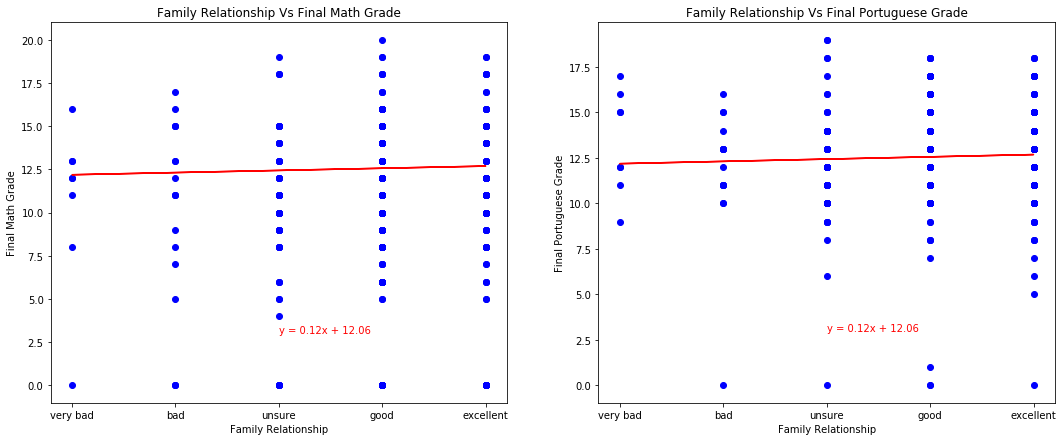

In [59]:
# Identify the family relationship with Final grade for math
f = plt.figure(figsize=(18,7))

ax = f.add_subplot(121)

xm_values = students_df['famrel']
ym_values = students_df['G3_math']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xm_values, y_values)
regressm_values = xm_values * slope + intercept
linem_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f"Math: {linem_eq}")

ax.scatter(xm_values,ym_values, color='b')
ax.plot(xm_values,regressm_values,'r-')
ax.set_title('Family Relationship Vs Final Math Grade')
ax.set_xlabel('Family Relationship')
plt.xticks([1,2,3,4,5],['very bad', 'bad', 'unsure', 'good','excellent'])
ax.set_ylabel('Final Math Grade')
ax.annotate(line_eq, (3,3),color='r')

# Identify the family relationship with Final grade for portuguese
ax = f.add_subplot(122)
x_values = students_df['famrel']
y_values = students_df['G3_por']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f"Portugese: {linep_eq}")

ax.scatter(x_values,y_values, color='b')
ax.plot(x_values,regress_values,'r-')
ax.set_title('Family Relationship Vs Final Portuguese Grade')
ax.set_xlabel('Family Relationship')
plt.xticks([1,2,3,4,5],['very bad', 'bad', 'unsure', 'good','excellent'])
ax.set_ylabel('Final Portuguese Grade')
ax.annotate(line_eq, (3,3),color='r')

plt.show()